# The exponential kernel.

## Functional Methods in Machine Learning 
Final exam

Due date: Monday, 2022/03/07, 13:00


In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import numpy as np
from scipy import stats
from sklearn import datasets
import matplotlib.pyplot as plt

import kernel_approximation as ka
import kernel_machine_learning as kml
import stochastic_plots as stoch

_ = plt.figure(figsize=(10, 8))

<Figure size 720x576 with 0 Axes>

## Generation of random samples: Inverse transform sampling.

Consider a real-valued random variable whose pdf is $f(x)$. 
The corresponding cdf is
$$
F(x) = \int_{-\infty}^{x} dx' f(x').
$$
This inverse of the cdf ($F^{-1}(p)$) can be used to generate random numbers from this distribution using the following algorithm:

1. Generate a sample from the $U[0,1]$ distribution $\left\{u_m \right\}_{m=1}^M $ with $ u_m \sim U[0,1]$.
2. The sample $\left\{w_m = F^{-1}(u_m) \right\}_{m=1}^M $ is such that $w_m \sim f(w)$. 

For instance, the pdf of an exponential distribution defined on the set of non-negative real numbers is
$$
f(x) = \lambda e^{-\lambda x},   x \ge 0,
$$
with $\lambda > 0$.

The corresponding cdf is
$$
F(x) = \int_{0}^{x} dx \lambda e^{-\lambda x} = 1 - e^{-\lambda x}, \  x \ge 0.
$$
The inverse of the cdf is such that $ F^{-1}(p) = x$.
Since $p = F(x) = 1 -e^{-\lambda x}$, $x = - \log (1-p) / \lambda$. Therefore, 
$$
F^{-1}(p) = -\frac{1}{\lambda} \log (1-p), \ 0 \le p \le 1.
$$
See, for instance, [ https://en.wikipedia.org/wiki/Exponential_distribution ]

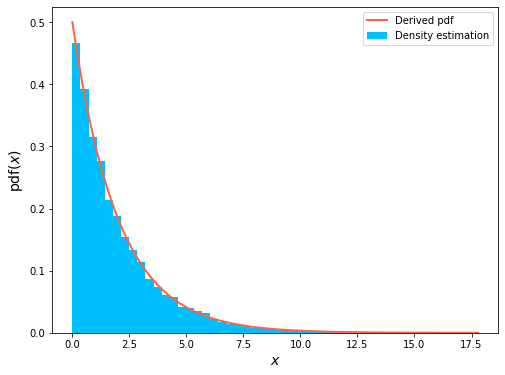

In [9]:
# Generate samples from the exponential distribution.

# Exponential distribution
def exp_pdf(x, gamma):
    return  np.exp(- x / gamma) / gamma

def exp_cdf(x, lambd):
    return 1.0 - np.exp(- x / gamma)

def exp_inverse_cdf(p, gamma):
    return - gamma * np.log(1.0 - p) 

# Inverse transform sampling.

gamma = 2.0

n_samples = 10000
U = np.random.rand(n_samples) # U ~ U[0, 1]
X = exp_inverse_cdf(U, gamma)

# Define a range for the plot. 

X_min, X_max = (np.min(X), np.max(X))

fontsize = 14
fig, ax = stoch.plot_pdf(
    X,
    lambda x: exp_pdf(x, gamma),
    fontsize=fontsize,
    fig_num=1
)
_ = ax.set_xlabel('$x$', fontsize=fontsize)
_ = ax.set_ylabel('pdf($x$)', fontsize=fontsize)

## Exponential kernel in 1 dimension

The exponential kernel in 1 dimension is
$$
k(x, x') = k(x - x') = \exp\left(- \frac{\left|x - x' \right|}{\gamma} \right).
$$

####  Q1. Express this kernel as the Fourier transform of a density $\hbox{pdf}(x)$.

$$
k(x) = \int_{-\infty}^{\infty} e^{i w x} \text{pdf}(w) \text dw.
$$

The density is proportional to the inverse Fourier transform of $k(x)$:

$$
\hbox{pdf}(w) = \frac{1}{2 \pi} \int_{-\infty}^{\infty} e^{-i x w} k(x) \text dx 
$$

##### Answer

Let us directly compute the wanted *pdf* by replacing the previous expression:

\begin{align*}
    p(w) & \propto \frac{1}{2 \pi} \int_{\mathbb R} e^{-i x w} k(x) \text dx \\
    & = \frac{1}{2 \pi} \int_{\mathbb R} e^{-i x w} e^{- \frac{|x|}{\gamma} } \text dx \\
    & = \frac{1}{2 \pi} \int_{-\infty}^{0} e^{-i x w + \frac{x}{\gamma}} \text dx +
                        \int_{0}^{\infty} e^{-i x w - \frac{x}{\gamma}} \text dx \\
    & = \frac{1}{2 \pi} \left( \frac{e^{-i x w + \frac{x}{\gamma}}}{-iw + \frac{1}{\gamma}} \right]_{-\infty}^{0} +
                        \left( \frac{e^{-i x w - \frac{x}{\gamma}}}{-iw - \frac{1}{\gamma}} \right]_{0}^{\infty} \\
    & = \frac{1}{2 \pi} \left(
                            \frac{1}{-iw + \frac{1}{\gamma}}
                            - \lim_{x \rightarrow -\infty} \frac{e^{-i x w}e^{\frac{x}{\gamma}}}{-iw + \frac{1}{\gamma}}
                            + \lim_{x \rightarrow \infty} \frac{e^{-i x w}e^{-\frac{x}{\gamma}}}{-iw - \frac{1}{\gamma}}
                            - \frac{1}{-iw - \frac{1}{\gamma}}
                         \right) \\
    & \substack{(1) \\ =} \frac{1}{2 \pi} \left( \frac{1}{-iw + \frac{1}{\gamma}} + \frac{1}{iw + \frac{1}{\gamma}} \right) \\
    & = \frac{1}{2 \pi} \frac{-iw + \frac{1}{\gamma} + iw + \frac{1}{\gamma}}{\left(-iw + \frac{1}{\gamma}\right)\left(iw + \frac{1}{\gamma}\right)} \\
    & = \frac{1}{\pi \gamma} \frac{1}{w^2 + \frac{1}{\gamma^2}} \\
    & = \frac{1}{\pi} \frac{\gamma}{1 + \gamma^2w^2} \\
\end{align*}

Where in $(1)$ we used in each limit that $\parallel e^{ix} = 1\parallel$ for any $x \in \mathbb R$, so the complex part of the exponentials is bounded.

At this point we may compare this expression with the Cauchy distribution with parameters $x_0$ and $\xi$:

$$
    f(x; x_0, \xi) = \frac{1}{\pi \xi} \frac{1}{1 + \left(\frac{x - x_0}{\xi}\right)^2}
$$

And we realize that our *pdf* matches to Cauchy's distribution with parameters $x_0=0$ and $\xi=1/\gamma$:

$$
    p(w) = f\left(x; x_0=0, \xi = \frac{1}{\gamma}\right)
$$

In fact, due to this equality we may additionaly assure that $p(w)$ is already normalized.

####  Q2. Derive the cdf and inverse of the cdf for $\hbox{pdf}(w)$. 
The corresponding cumulative distribution function is:

$$
\hbox{cdf}(w) = \int_{-\infty}^w \hbox{pdf}(w') dw'
$$
  
##### Answer

Using the fact that our distribution is a Cauchy, we already know its *cdf* [[1](https://en.wikipedia.org/wiki/Cauchy_distribution)]:

$$
    F(x; x_0, \xi) = \frac{1}{\pi} \arctan\left(\frac{x - x_0}{\xi}\right) + \frac{1}{2} \qquad \forall x \in (0,1)
$$

In our case:

$$
    F(x) = \frac{1}{\pi} \arctan(\gamma x) + \frac{1}{2} \qquad \forall x \in (0,1)
$$

Its inverse can be computed directly:

$$
    F^{-1}(q) = \frac{1}{\gamma} \tan\left( \pi \left( q - \frac{1}{2} \right)\right) \qquad \forall x \in (0,1)
$$

#### Q3. Use the method of the inverse to generate random numbers sampled from this $\text{pdf}(w)$.

##### Answer

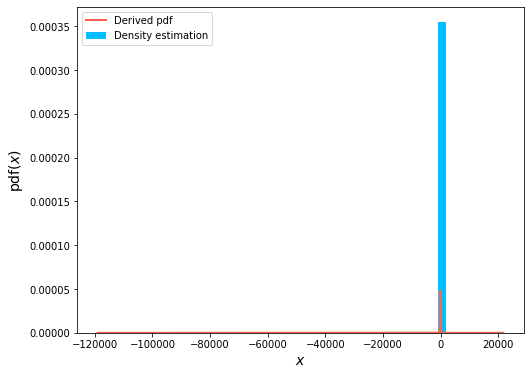

In [7]:
def fixed_cauchy_pdf(x, gamma):
    return 1.0 / np.pi *  gamma / (1.0 + x**2 * gamma**2)

def fixed_cauchy_inverse_cdf(x, gamma):
    return 1.0 / gamma * np.tan( np.pi * (x - 0.5))

# Inverse transform sampling.
gamma = 2.0

n_samples = 10000
U = np.random.rand(n_samples) # U ~ U[0, 1]
X = fixed_cauchy_inverse_cdf(U, gamma)

X_min, X_max = (np.min(X), np.max(X))
fig, ax = stoch.plot_pdf(
    X,
    lambda x: fixed_cauchy_pdf(x, gamma),
    fontsize=14
)
_ = ax.set_xlabel('$x$', fontsize=fontsize)
_ = ax.set_ylabel('pdf($x$)', fontsize=fontsize)

In this last graph the Cauchy distribution cannot be truly appreciated. It is quite probable that in a $10000$ sample we may find rare values that extend the limits of our graph. Let us focus on a fixed interval around $x_0 = 0$, $[-5, 5]$, to better see the *pdf*.

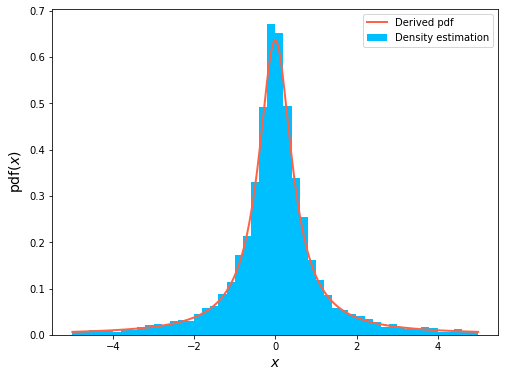

In [8]:
X_reduced = X[np.abs(X) < 5]

fig, ax = stoch.plot_pdf(
    X_reduced,
    lambda x: fixed_cauchy_pdf(x, gamma),
    fontsize=14
)
_ = ax.set_xlabel('$x$', fontsize=fontsize)
_ = ax.set_ylabel('pdf($x$)', fontsize=fontsize)

As a last sanity check, this graph matches [Wikipedia's](https://en.wikipedia.org/wiki/Cauchy_distribution), where there $\gamma$ is what we called $\xi$. That means we must compare our $\gamma = 2$ graph with their $\gamma = 0.5$ graph, which are reasonably similar.

## Exponential kernel in $D$ dimensions.

Consider the exponential kernel in $D$ dimensions
$$ k(\mathbf{x}, \mathbf{x}') = k(\mathbf{x}- \mathbf{x}') = \exp\left\{- \frac{\lVert \mathbf{x}- \mathbf{x}' \rVert_1}{\gamma} \right\},$$
with the $L_1$ norm
$$ \lVert \mathbf{x}- \mathbf{x}' \rVert_1 = \sum_{d=1}^D \left|x_d \right|.$$

The Fourier transform of the exponential kernel in $D$ dimensions is proportional to a pdf:
$$
\text{pdf}(\mathbf{w}) \propto \int_{\mathbb{R}^D} e^{-i \mathbf{w}^T \mathbf{x}} \exp\left\{- \frac{\lVert \mathbf{x} \rVert_1}{\gamma} \right\} d \mathbf{x}.
$$

#### Q4. Compute the Fourier transform of the exponential kernel in $D$ dimensions.
The Fourier transform of a translationally invariante kernel

$$
k(\mathbf{x}, \mathbf{x}') = k(\mathbf{x} - \mathbf{x}').
$$

is

$$
\text{pdf}(\mathbf{w}) = \frac{1}{\left(2 \pi\right)^D} \int_{\mathbb{R}^D} e^{- i \mathbf{w}^T \mathbf{x}} k(\mathbf{x}) d\mathbf{x}
$$

[YOUR ANSWER HERE]


#### Q5. Use the method of the inverse to generate random numbers sampled from $\text{pdf}(\mathbf{w})$.

##### Answer

We show the behaviour for a 2-dimensional kernel:

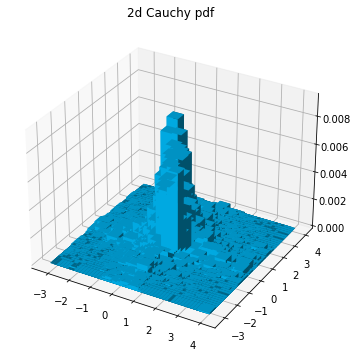

In [35]:
# Inverse transform sampling.
gamma = 2.0

n_samples = 10000

# U ~ U[0, 1] in 2D
U = np.random.rand(n_samples, 2)
X = fixed_cauchy_inverse_cdf(U, gamma)

stoch.plot_pdf_3d(X, title="2d Cauchy pdf")

Apart from visualizing the *pdf* in 3D we may also graph the *pdf* for each component independently, since they are independent random variables:

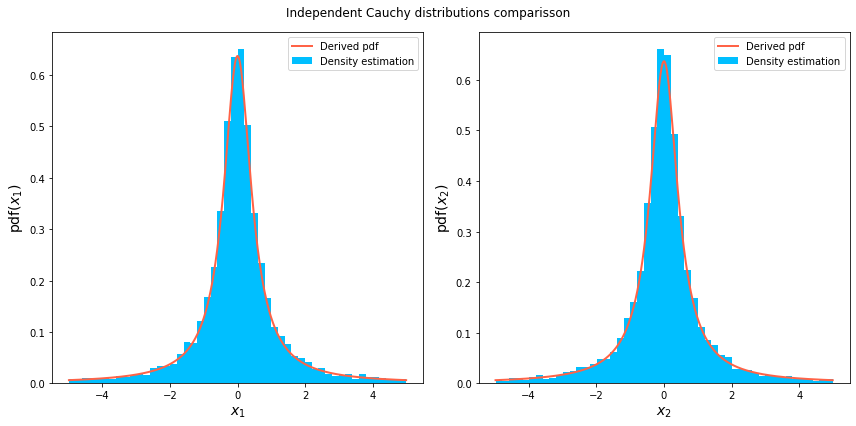

In [66]:
X1, X2 = X[:,0], X[:,1]
X1_clipped, X2_clipped = [ x[np.abs(x) < 5] for x in [X1, X2] ]

_, axis = plt.subplots(1, 2, num=2, figsize=(12, 6))

stoch.plot_pdf(
    X1_clipped,
    lambda x: fixed_cauchy_pdf(x, gamma),
    fontsize=14,
    ax=axis[0]
)
stoch.plot_pdf(
    X2_clipped,
    lambda x: fixed_cauchy_pdf(x, gamma),
    fontsize=14,
    ax=axis[1]
)

plt.suptitle("Independent Cauchy distributions comparisson")
axis[0].set_xlabel("$x_1$", fontsize=fontsize)
axis[0].set_ylabel("pdf($x_1$)", fontsize=fontsize)
axis[1].set_xlabel("$x_2$", fontsize=fontsize)
axis[1].set_ylabel("pdf($x_2$)", fontsize=fontsize)

plt.tight_layout()
plt.show()

#### Q6. Write code to generate random Fourier Features corresponding to the exponential kernel in D dimensions.

Complete the code for the class 

```python
class RandomFeaturesSamplerExp(RandomFeaturesSampler):
```

in the file

``` 
kernel_approximation.py
```

##### Answer



### Generation of Random Fourier Features: Alternative sampling scheme.

Consider the translationally invariant kernel $k\left(\mathbf{x}, \mathbf{x}'\right) = k\left(\mathbf{x} - \mathbf{x}'\right)$, with $\mathbf{x}, \mathbf{x}' \in \mathbb{R}^D$.

Acording to Bochner's theorem, this type of kernel can be expressed as the Fourier transform of a (possibly not normalized) density $p(\mathbf{w})$
$$
k\left(\mathbf{x} - \mathbf{x}'\right) = \int_{-\infty}^{\infty} d\mathbf{w} p\left(\mathbf{w}\right) e^{i \mathbf{w}^T \left(\mathbf{x} - \mathbf{x}'\right)}.
$$
Since the kernel funtion is real and symmetric, this expression can be written as 
$$
k\left(\mathbf{x} - \mathbf{x}'\right) = \int_{-\infty}^{\infty} d\mathbf{w} p\left(\mathbf{w}\right) \cos \left(\mathbf{w}^T \left(\mathbf{x} - \mathbf{x}'\right) \right).
$$

Show that the set of random features
$$
\left\{ \left( \cos \mathbf{w}^T \mathbf{x}, \sin \mathbf{w}^T \mathbf{x} \right); \mathbf{w} \sim p(\mathbf{w})\right\}.
$$
and the set 
$$
\left\{\sqrt{2} \cos \left(\mathbf{w}^T \mathbf{x} + b \right); \ \mathbf{w} \sim p(\mathbf{w}); \ b \sim U[0 , 2 \pi]; \ \mathbf{w} \perp b\right\}
$$
provide the same approximation of the kernel.

#### The kernel approximation using the first type of features is
\begin{align*}
k\left(\mathbf{x}, \mathbf{x}'\right) & = \int_{-\infty}^{\infty} d\mathbf{w} p(\mathbf{w}) \left( \cos \mathbf{w}^T \mathbf{x}, \, \sin \mathbf{w}^T \mathbf{x} \right) \left( \cos \mathbf{w}^T \mathbf{x}', \, \sin \mathbf{w}^T \mathbf{x}' \right)^T \\
& = \int_{-\infty}^{\infty} d\mathbf{w} p(\mathbf{w}) \left( \cos \mathbf{w}^T \mathbf{x}  \, \cos \mathbf{w}^T \mathbf{x}' + \sin \mathbf{w}^T \mathbf{x} \,  \sin \mathbf{w}^T \mathbf{x}' \right) \\
& = \int_{-\infty}^{\infty} d\mathbf{w} p(\mathbf{w}) \cos \left( \mathbf{w}^T \left( \mathbf{x} - \mathbf{x}' \right) \right).
\end{align*}

#### Q7. Derive the kernel approximation using the second type of features.

[YOUR ANSWER HERE]


#### Q8. Implement the sampling method based on the second type of random features.

Fill in the corresponding code in the file 
``` 
kernel_approximation.py
```

#### Q9. Illustrate that both types of feaures approximate the exponential kernel when $p(\mathbf{w})$ is the inverse Fourier transform of the exponential kernel in $D$ dimensions. 



In [4]:
## Generate data
# 3-D data
n_instances = 1000
X, t = datasets.make_s_curve(n_instances, noise=0.1)
X = X[np.argsort(t)]

In [5]:
# Approximate the exponential kernel using Random Fourier Features.

length_scale = 2.0
A = 1.0

def kernel(X, Y): 
    return kml.exponential_kernel( X, Y, A=1.0, l=length_scale)

## Create instances of the random features sampler

#  <YOUR ANSWER HERE>


### Q10. Train and evaluate different classifiers.

Solve the classification problem using different kernel methods using the same data in

https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_kernel_approximation.html#sphx-glr-auto-examples-miscellaneous-plot-kernel-approximation-py

**To get more stable results, the process should be repeated for $10$ different random train / test partitions of the data.**

Using 5-fold cross validation on the training data, determine the optimal values of the hyperparameter for the following cases: 
1. Non-linear SVM + RBF kernel [C, gamma]
2. Linear SVM + RBF random features [C, gamma, n_features]
3. Linear SVM + RBF Nyström features [C, gamma, n_features]
4. Non-linear SVM + exponential kernel [C, length_scale] 
5. Linear SVM + exponential random features [C, length_scale, n_features]
6. Linear SVM + exponential Nyström features [C, length_scale, n_features]

##### NOTES
* Determine the hyperparameter grid on which the search is made using references from the literature. Include those references in the Chicago citation format ( https://www.chicagomanualofstyle.org/tools_citationguide/citation-guide-2.html).

* It may be useful to vary one of the hyperparameters while keeping the other fixed (include those plots in your report). For instance, for $n_{features}$. 

##### REPORT:
* Plot the curve that traces the dependence of the CV, training and test error as a function of $n_{features}$ for a fixed value of the other parameters.
* Train final models with the values of the optimal hyperparameters.  
* Provide in a table the mean and the standard deviation of the training error, the cross-validation error and test error for each of the 6 methods considered.
* Provide in a table the mean and the standard deviation of the times for the cross-validation step, for the final training time, and for the prediction time in the test set. To this end, use the Python library $\texttt{timeit}$.

### Sklearn resources.

1. Non-linear SVM for classification: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

2. Linear SVM for classification: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

3. Cross-validation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

4. Timing and accuracy plots for random Fourier Features and Nyström features: https://scikit-learn.org/stable/modules/generated/sklearn.kernel_approximation.RBFSampler.html